In [47]:
# imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Data Import and Exploration

In [48]:
# import data
v_p_df = pd.read_csv('volume_pressure_data.csv')
v_p_df.head() # get a sense of the table

,Volume,Pressure
0,48,29.1250
1,46,30.5625
2,44,31.9375
3,42,33.5000
4,40,35.3125


In [49]:
v_p_df.shape # basic info

(25, 2)

In [50]:
v_p_df.agg(['mean', 'median', 'std']) # aggregate by mean, median and standard deviation for each column

,Volume,Pressure
mean,27.120000,61.507500
median,24.000000,58.812500
std,11.192706,25.840546


# Data Visualization

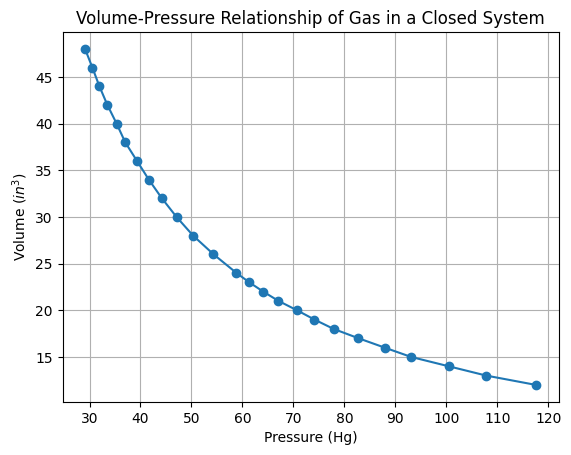

In [64]:
# make a volume-pressure plot
fig, ax = plt.subplots()
ax.plot(v_p_df['Pressure'], v_p_df['Volume'], 'o-') # lineplot with dot marker and trendline superimposed
ax.grid(True) # enable grids
ax.set_ylabel('Volume ($in^3$)')
ax.set_xlabel('Pressure (Hg)')
ax.set_xticks(np.arange(30, 130, 10)) # set the x ticks denser
ax.set_title("Volume-Pressure Relationship of Gas in a Closed System")
plt.show()

In [52]:
p0, p1, p2 = np.polyfit(v_p_df['Pressure'], v_p_df['Volume'], 2) # quadratic fit with volume as dependent variables

def quad_fit(x):
    """
    Calculates the predicted Volume (in^3) according to the quadratic curve fit
    """
    return p0 * x**2 + p1 * x + p2

In [53]:
dummy_x = np.linspace(
    v_p_df['Pressure'].min(),
    v_p_df['Pressure'].max(),
    num=1000
) # creates x values for plotting
y_hat = [quad_fit(x) for x in dummy_x] # fitted y values

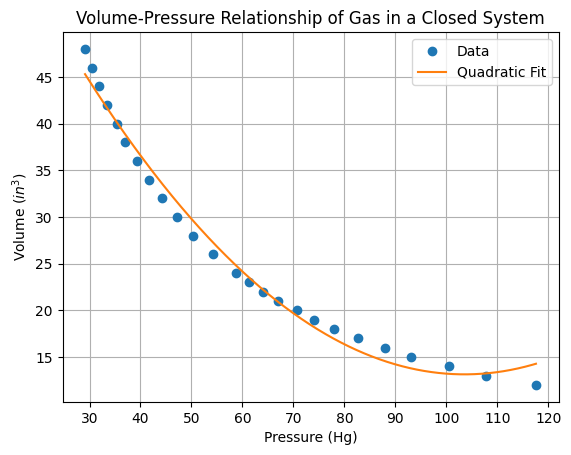

In [63]:
# plot the fitted curve
fig, ax = plt.subplots()
ax.plot(v_p_df['Pressure'], v_p_df['Volume'], 'o', label="Data") # original data
ax.plot(dummy_x, y_hat, label='Quadratic Fit') # fitted curve
ax.grid(True)
ax.set_ylabel('Volume ($in^3$)')
ax.set_xlabel('Pressure (Hg)')
ax.set_xticks(np.arange(30, 130, 10)) # set the x ticks denser
ax.set_title("Volume-Pressure Relationship of Gas in a Closed System")
plt.legend()
plt.show()

# Deriving a Mathematical Model

In [55]:
p0, p1, p2

(np.float64(0.0058048837731734014),
 np.float64(-1.2023395620470638),
 np.float64(75.39095105658471))

The curve equation is
$$ V\ (in^3) = 5.8049\times 10^{-3}(\frac{in^3}{Hg^2})\ P^2\ - 1.202(\frac{in^3}{Hg})\ P + 75.39 (in^3) $$
which does not make physical sense assuming the gas is following ideal behavior. The ideal gas law states that $ PV = nRT $, or $ PV = const $ for a given gas under constant temperature. Therefore, pressure and volume are expected to be **inversely related**.

# Error Analysis

In [56]:
# Calculate squared errors for each row
v_p_df['Error_Sq'] = v_p_df.apply(lambda row: (row.Volume - quad_fit(row.Pressure))**2, axis=1)
# Calculate RMSE = sqrt(mean(Sigma(error^2)))
rmse = np.sqrt(np.mean(v_p_df['Error_Sq']))
print(f"The RMSE between the fitted quadratic curve and the actual data points is {rmse:.4f}")

The RMSE between the fitted quadratic curve and the actual data points is 1.2631


In [57]:
# Relative RMSE
rmse / v_p_df['Volume'].mean()

np.float64(0.04657371646292004)

The RMSE is 1.2631 $in^3$, and it's 5% relative to the average volume data. This number by itself suggests a good fit in my opinion. However, looking at the actual curve, it is apparent that the fitted curve reaches a minimum and then starts to increase at the higher end of the pressure range, whereas the measured volumes decreases monotonically within all the observed range. This suggests a possible problem with the curve fit and that this fit may not represent the data well, especially if more observations are made with higher pressures.